In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

# Dataset Overview

In [2]:
csv=pd.read_csv("./Desktop/Assgn/transaction_data.csv")
df=pd.DataFrame(csv)

df.describe()

,UserId,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem
count,1.083818e+06,1.083818e+06,1.083818e+06,1.083818e+06,1.083818e+06
mean,2.410162e+05,6.159417e+06,6.582687e+05,2.865675e+01,9.498798e+00
std,1.423364e+05,1.476341e+05,4.526314e+05,6.542432e+02,2.308139e+03
min,-1.000000e+00,5.900015e+06,-1.000000e+00,-2.429850e+05,-1.526564e+04
25%,2.593920e+05,6.026856e+06,4.609080e+05,3.000000e+00,1.730000e+00
50%,3.020220e+05,6.166611e+06,4.752930e+05,9.000000e+00,2.880000e+00
75%,3.413550e+05,6.289569e+06,4.889430e+05,3.000000e+01,5.700000e+00
max,3.840270e+05,6.397457e+06,1.894494e+06,2.429850e+05,1.696285e+06


In [3]:
df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083818 entries, 0 to 1083817
Data columns (total 8 columns):
UserId                    1083818 non-null int64
TransactionId             1083818 non-null int64
TransactionTime           1083818 non-null object
ItemCode                  1083818 non-null int64
ItemDescription           1080910 non-null object
NumberOfItemsPurchased    1083818 non-null int64
CostPerItem               1083818 non-null float64
Country                   1083818 non-null object
dtypes: float64(1), int64(4), object(3)
memory usage: 66.2+ MB


# Data Preprocessing
The first step is to drop exact duplicates, in this case every transaction is atleast present twice

In [5]:
prop=df.drop_duplicates(subset=['UserId', 'TransactionId', 'TransactionTime', 'ItemCode', 'ItemDescription', 'NumberOfItemsPurchased', 'CostPerItem', 'Country'], keep = 'first')
prop.describe()

,UserId,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem
count,536572.000000,5.365720e+05,5.365720e+05,536572.000000,5.365720e+05
mean,240163.453561,6.159156e+06,6.583921e+05,28.862127,9.560211e+00
std,142690.785461,1.475017e+05,4.528156e+05,657.432645,2.319590e+03
min,-1.000000,5.900015e+06,-1.000000e+00,-242985.000000,-1.526564e+04
25%,-1.000000,6.026856e+06,4.609080e+05,3.000000,1.730000e+00
50%,301098.000000,6.166276e+06,4.752930e+05,9.000000,2.880000e+00
75%,341061.000000,6.288876e+06,4.889430e+05,30.000000,5.700000e+00
max,384027.000000,6.397457e+06,1.894494e+06,242985.000000,1.696285e+06


In [6]:
prop=prop[prop['UserId']!=-1] #Dropping UserId = -1 cases (*Copied from Assignment1, should've focused on TransactionId here)
prop.describe()

,UserId,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem
count,401569.000000,4.015690e+05,4.015690e+05,401569.000000,4.015690e+05
mean,320904.052870,6.166127e+06,6.431912e+05,36.551166,9.024044e+00
std,35994.060839,1.439499e+05,4.342055e+05,750.881750,2.678541e+03
min,259266.000000,5.900015e+06,-1.000000e+00,-242985.000000,0.000000e+00
25%,292719.000000,6.040430e+06,4.618320e+05,6.000000,1.730000e+00
50%,318045.000000,6.179965e+06,4.759230e+05,15.000000,2.700000e+00
75%,352422.000000,6.292385e+06,4.885650e+05,36.000000,5.180000e+00
max,384027.000000,6.397457e+06,1.894494e+06,242985.000000,1.696285e+06


In [7]:
prop=prop[prop['ItemCode']!=-1].reset_index(drop=True) #These have Delivery, Discount etc ItemDescription
prop.describe()

,UserId,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem
count,399788.000000,3.997880e+05,3.997880e+05,399788.000000,3.997880e+05
mean,321057.354368,6.166153e+06,6.460566e+05,36.678217,8.282739e+00
std,35922.934999,1.439601e+05,4.330394e+05,752.417568,2.682775e+03
min,259266.000000,5.900015e+06,4.200000e+01,-242985.000000,0.000000e+00
25%,293139.000000,6.040628e+06,4.626090e+05,6.000000,1.730000e+00
50%,318150.000000,6.180009e+06,4.759860e+05,15.000000,2.700000e+00
75%,352611.000000,6.292385e+06,4.886070e+05,36.000000,5.180000e+00
max,384027.000000,6.397457e+06,1.894494e+06,242985.000000,1.696285e+06


One big problem we can notice from the above describe is the min and max of 'NumberOfItemsPurchased'.

Below I've listed the UserId's complete transaction history and as we can see its a big problem where a user adds a item to the cart and then cancels it a while later.

In [8]:
prop[prop['UserId']==345366]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
128478,345366,6089303,Mon Jul 30 05:52:00 IST 2018,482622,PANTRY PASTRY BRUSH,3,1.73,United Kingdom
180164,345366,6089303,Mon Jul 30 05:52:00 IST 2018,482580,PANTRY SCRUBBING BRUSH,3,2.28,United Kingdom
232737,345366,6396324,Wed Feb 20 05:27:00 IST 2019,500703,"PAPER CRAFT , LITTLE BIRDIE",-242985,2.88,United Kingdom
289030,345366,6396313,Wed Feb 20 05:15:00 IST 2019,500703,"PAPER CRAFT , LITTLE BIRDIE",242985,2.88,United Kingdom


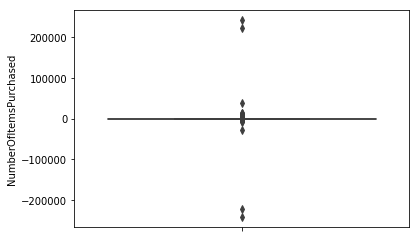

In [9]:
sns.boxplot(y=prop["NumberOfItemsPurchased"])

The above Boxplot indicates the same problem of cancelled Transactions still present in Dataset

The function below finds and removes such cancelled Transactions

In [47]:
def invalidFix(db,Id):
    
    for k in Id['UserId'] :
        temp= db[db['UserId']==k].reset_index()
        neg=temp[temp['NumberOfItemsPurchased'] <0].reset_index(drop=True)

        ind1=temp.index
        ind2=neg.index
        for i in ind2:
            for j in ind1:
                if (np.abs(neg.iloc[i][6])==temp.iloc[j][6]) and (neg.iloc[i][4]==temp.iloc[j][4]) :
                    db.at[neg.iloc[i]['index'],'NumberOfItemsPurchased']= -1 # XX Useless, already negative
                    db.at[temp.iloc[j]['index'],'NumberOfItemsPurchased']= -1
                    break           
            db.at[neg.iloc[i]['index'],'NumberOfItemsPurchased']= -1 # XX Useless, already negative
    
    db=db[db['NumberOfItemsPurchased']>=0]
    
    return db


users=prop.iloc[:][['UserId','NumberOfItemsPurchased']]

users=users[users['NumberOfItemsPurchased']<0]

users=users.drop_duplicates(subset=['UserId'],keep = 'first')
users.drop(users.columns[1], axis = 1, inplace = True) #Produces a list of unique UserIds which have a -ve 'NumberOfItemsPurchased'

prop=invalidFix(prop,users)

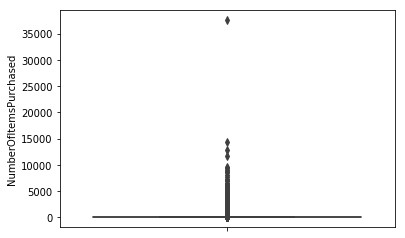

In [48]:
sns.boxplot(y=prop["NumberOfItemsPurchased"])

In [ ]:
prop.to_csv('newmodified.csv', sep=',') #Saving the output as previous Function takes time and any loss would cost time (inlcude 'index=False' to prevent the hassle below while loading)

In [10]:
new=pd.read_csv('newmodified.csv')

In [11]:
new.head()

,Unnamed: 0,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,4,285957,6307136,Fri Jan 11 09:50:00 IST 2019,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom


In [12]:
new.drop(new.columns[0],axis=1,inplace=True)
new.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,285957,6307136,Fri Jan 11 09:50:00 IST 2019,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom


In [13]:
new.reset_index(drop=True)

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,285957,6307136,Fri Jan 11 09:50:00 IST 2019,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom
5,345954,6162981,Fri Sep 28 10:51:00 IST 2018,471576,NATURAL SLATE CHALKBOARD LARGE,9,6.84,United Kingdom
6,339822,6255403,Mon Dec 10 09:23:00 IST 2018,1783845,MULTI COLOUR SILVER T-LIGHT HOLDER,36,1.18,United Kingdom
7,328440,6387425,Sat Feb 16 10:35:00 IST 2019,494802,SET OF 6 RIBBONS PERFECTLY PRETTY,36,3.99,United Kingdom
8,316848,6262696,Sat Dec 15 10:05:00 IST 2018,460215,RED HARMONICA IN BOX,36,1.73,United Kingdom
9,372897,6199061,Mon Oct 29 09:04:00 IST 2018,459669,WOODEN BOX OF DOMINOES,3,1.73,United Kingdom


In [14]:
prop=new.copy() #Back to business
prop

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,285957,6307136,Fri Jan 11 09:50:00 IST 2019,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom
5,345954,6162981,Fri Sep 28 10:51:00 IST 2018,471576,NATURAL SLATE CHALKBOARD LARGE,9,6.84,United Kingdom
6,339822,6255403,Mon Dec 10 09:23:00 IST 2018,1783845,MULTI COLOUR SILVER T-LIGHT HOLDER,36,1.18,United Kingdom
7,328440,6387425,Sat Feb 16 10:35:00 IST 2019,494802,SET OF 6 RIBBONS PERFECTLY PRETTY,36,3.99,United Kingdom
8,316848,6262696,Sat Dec 15 10:05:00 IST 2018,460215,RED HARMONICA IN BOX,36,1.73,United Kingdom
9,372897,6199061,Mon Oct 29 09:04:00 IST 2018,459669,WOODEN BOX OF DOMINOES,3,1.73,United Kingdom


In [15]:
prop=prop.reset_index(drop=True)

In [16]:
bad_index = prop[prop['NumberOfItemsPurchased'] > 10000].index #Dealing with Outliers in 'NumberOfItemsPurchased'
for i in bad_index:
    prop.at[i,'NumberOfItemsPurchased'] = 0
prop.iloc[bad_index,:]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
105944,278376,6367251,Wed Feb 06 11:57:00 IST 2019,1781346,ASSTD DESIGN 3D PAPER STICKERS,0,0.00,United Kingdom
230925,275835,6103548,Wed Aug 08 06:52:00 IST 2018,466137,SMALL POPCORN HOLDER,0,1.00,United Kingdom
250273,379827,5990732,Sun May 06 06:43:00 IST 2018,463113,EMPIRE DESIGN ROSETTE,0,1.14,United Kingdom
255016,270921,6303088,Tue Jan 08 08:26:00 IST 2019,1765617,WORLD WAR 2 GLIDERS ASSTD DESIGNS,0,0.29,United Kingdom


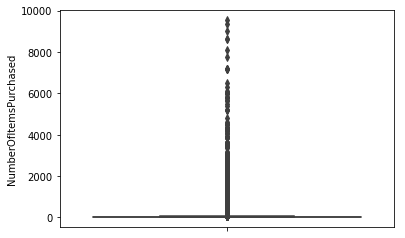

In [17]:
sns.boxplot(y=prop["NumberOfItemsPurchased"])

The above Boxplot doesn't have outliers but looks like this because of the skewness of the data 

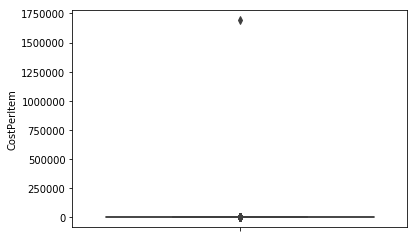

In [18]:
sns.boxplot(y=prop["CostPerItem"])

The above Boxplot shows the outlier

In [19]:
bad_index = prop[prop['CostPerItem'] > 10000].index    #Dealing with the outliers in 'CostPerItem'
for i in bad_index:
    prop.at[i,'CostPerItem'] = np.NaN
prop.iloc[bad_index,:]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
196335,288687,5900323,Mon Feb 12 06:37:00 IST 2018,465780,RETROSPOT LAMP,24,NaN,United Kingdom


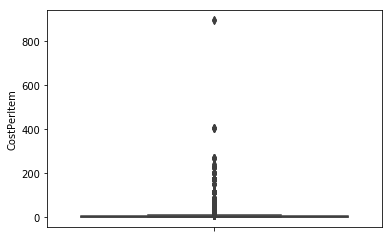

In [20]:
sns.boxplot(y=prop["CostPerItem"])

The above Boxplot seems to have outliers but upon checking the ItemDescription it felt like a reasonable Cost, hence not removing it.  (Check my assignment 1 solution for a detailed analysis)

In [21]:
prop.describe()

,UserId,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem
count,388292.000000,3.882920e+05,3.882920e+05,388292.000000,388291.000000
mean,321230.435296,6.166738e+06,6.458944e+05,37.896173,3.966763
std,35911.886600,1.439931e+05,4.329413e+05,121.270385,5.810548
min,259287.000000,5.900015e+06,4.200000e+01,0.000000,0.000000
25%,293349.000000,6.041662e+06,4.625460e+05,6.000000,1.730000
50%,318339.000000,6.180768e+06,4.759650e+05,18.000000,2.700000
75%,352695.000000,6.292803e+06,4.886910e+05,36.000000,5.180000
max,384027.000000,6.397457e+06,1.894494e+06,9558.000000,896.310000


Notice the min of 'ItemCode' which is way below 25%, hence checking it

In [22]:
prop[prop['ItemCode'] < 10000] 

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
5610,280749,5917593,Tue Feb 20 07:30:00 IST 2018,42,CARRIAGE,3,69.0,United Kingdom
13572,313131,6377448,Mon Feb 11 11:08:00 IST 2019,42,CARRIAGE,3,69.0,EIRE
14070,280098,6147988,Sun Sep 16 05:06:00 IST 2018,42,CARRIAGE,3,69.0,United Kingdom
18655,280812,6228871,Fri Nov 23 08:46:00 IST 2018,42,CARRIAGE,3,69.0,United Kingdom
22731,280350,6361454,Mon Feb 04 12:33:00 IST 2019,42,CARRIAGE,3,69.0,United Kingdom
27662,280350,6243941,Mon Dec 03 09:33:00 IST 2018,42,CARRIAGE,3,69.0,United Kingdom
28548,297276,6323251,Sat Jan 19 07:42:00 IST 2019,42,CARRIAGE,3,69.0,EIRE
32542,313131,6011951,Sat May 26 11:11:00 IST 2018,42,CARRIAGE,3,69.0,EIRE
32638,313131,6037438,Sat Jun 16 09:29:00 IST 2018,42,CARRIAGE,3,69.0,EIRE
36264,313131,6359023,Sun Feb 03 13:21:00 IST 2019,42,CARRIAGE,3,69.0,EIRE


In [23]:
prop=prop[prop['ItemCode'] > 10000]    #Removing the CARRIAGE transactions too
prop.describe()

,UserId,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem
count,388160.000000,3.881600e+05,3.881600e+05,388160.000000,388159.000000
mean,321235.558414,6.166738e+06,6.461141e+05,37.908033,3.944583
std,35915.909752,1.439951e+05,4.328510e+05,121.289298,5.680375
min,259287.000000,5.900015e+06,2.100420e+05,0.000000,0.000000
25%,293349.000000,6.041662e+06,4.625670e+05,6.000000,1.730000
50%,318339.000000,6.180768e+06,4.759650e+05,18.000000,2.700000
75%,352695.000000,6.292803e+06,4.886910e+05,36.000000,5.180000
max,384027.000000,6.397457e+06,1.894494e+06,9558.000000,896.310000


In [24]:
prop[prop['ItemCode'] == 492324]    #Luckily my eye caught this too while studying for CARRIAGE codes

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
2232,321090,6305926,Wed Jan 09 08:40:00 IST 2019,492324,Next Day Carriage,3,20.7,United Kingdom
2819,340389,6122314,Sat Aug 25 09:41:00 IST 2018,492324,Next Day Carriage,3,20.7,United Kingdom
3261,365022,6266260,Mon Dec 17 09:05:00 IST 2018,492324,Next Day Carriage,3,20.7,United Kingdom
6251,370692,6262619,Sat Dec 15 09:03:00 IST 2018,492324,Next Day Carriage,3,20.7,United Kingdom
12409,313887,6255821,Mon Dec 10 11:48:00 IST 2018,492324,Next Day Carriage,3,20.7,United Kingdom
29065,352947,6167590,Mon Oct 01 08:00:00 IST 2018,492324,Next Day Carriage,3,20.7,United Kingdom
40623,379533,6151266,Tue Sep 18 07:12:00 IST 2018,492324,Next Day Carriage,3,20.7,United Kingdom
41147,303723,6134491,Mon Sep 03 06:31:00 IST 2018,492324,Next Day Carriage,3,20.7,United Kingdom
43637,383565,6255480,Mon Dec 10 10:10:00 IST 2018,492324,Next Day Carriage,3,20.7,United Kingdom
48488,339381,6394696,Tue Feb 19 08:10:00 IST 2019,492324,Next Day Carriage,3,20.7,United Kingdom


In [25]:
prop=prop[prop['ItemCode'] != 492324]

# Frequently Bought Together model
The core idea is to form a square matrix of shape (ItemCode,ItemCode) where I keep track of number of times each pair of ItemCode were bought together.
And to predict what other 2 items are Frequently bought with it I will traverse in the specific matrix row and return the top 2 pair values.

In [26]:
cpy=prop.copy()    
cpy=cpy.sort_values('ItemCode')
cpy=cpy.groupby('TransactionId')['ItemCode'].unique()
cpy.head()

TransactionId
5900015    [456330, 477792, 1492113, 1764609, 1772526, 17...
5900026                                     [475272, 475293]
5900037    [456834, 456855, 457317, 468510, 475062, 47508...
5900048                     [481152, 481173, 481194, 482160]
5900059                                             [456876]
Name: ItemCode, dtype: object

In [27]:
cpy=cpy.reset_index()
cpy #Its a DF of all the items bought together

,TransactionId,ItemCode
0,5900015,"[456330, 477792, 1492113, 1764609, 1772526, 17..."
1,5900026,"[475272, 475293]"
2,5900037,"[456834, 456855, 457317, 468510, 475062, 47508..."
3,5900048,"[481152, 481173, 481194, 482160]"
4,5900059,[456876]
5,5900070,"[210042, 441735, 456204, 456351, 457611, 45954..."
6,5900081,[463806]
7,5900092,"[475272, 475293]"
8,5900103,"[434259, 442428, 442491, 456330, 459291, 47779..."
9,5900114,[446418]


In [28]:
cpy2=prop.copy()
cpy2=cpy2.sort_values('ItemCode')
cpy2 

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
91757,270207,6019453,Sat Jun 02 11:10:00 IST 2018,210042,INFLATABLE POLITICAL GLOBE,15,1.18,United Kingdom
72274,358785,6035722,Fri Jun 15 07:36:00 IST 2018,210042,INFLATABLE POLITICAL GLOBE,12,1.18,United Kingdom
197284,364665,5948778,Sun Mar 25 08:11:00 IST 2018,210042,INFLATABLE POLITICAL GLOBE,36,1.18,United Kingdom
111948,325794,6002007,Wed May 16 08:16:00 IST 2018,210042,INFLATABLE POLITICAL GLOBE,6,1.18,United Kingdom
186337,267351,5920156,Wed Feb 21 06:56:00 IST 2018,210042,INFLATABLE POLITICAL GLOBE,108,1.18,France
12354,310149,6017693,Fri Jun 01 09:33:00 IST 2018,210042,INFLATABLE POLITICAL GLOBE,12,1.18,United Kingdom
16308,267708,5953728,Fri Mar 30 09:04:00 IST 2018,210042,INFLATABLE POLITICAL GLOBE,3,1.18,United Kingdom
365943,305025,6054972,Sat Jun 30 08:56:00 IST 2018,210042,INFLATABLE POLITICAL GLOBE,3,1.18,United Kingdom
53988,377874,5990974,Sun May 06 07:02:00 IST 2018,210042,INFLATABLE POLITICAL GLOBE,36,1.18,United Kingdom
142465,267351,5968919,Sat Apr 14 05:57:00 IST 2018,210042,INFLATABLE POLITICAL GLOBE,360,1.18,France


In [29]:
items=cpy2['ItemCode'].unique()
items #This is a matrix with all the unique ItemCode values in ascending order

array([ 210042,  211680,  212520, ..., 1894431, 1894452, 1894494],
      dtype=int64)

In [30]:
db = pd.DataFrame(items) 
db.rename(columns = {0:'ItemCode'}, inplace=True)
db

,ItemCode
0,210042
1,211680
2,212520
3,212583
4,212604
5,212625
6,212793
7,212835
8,231021
9,315630


In [31]:
for item in items:
    db.insert(db.shape[1] ,str(item) ,0)

print(db.shape)
db.head() #This is my version of the square matrix that will be used to keep track of each pair

(3184, 3185)


,ItemCode,210042,211680,212520,212583,212604,212625,212793,212835,231021,...,1894242,1894284,1894305,1894326,1894368,1894389,1894410,1894431,1894452,1894494
0,210042,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,211680,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,212520,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,212583,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,212604,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Below is the Algo for filling the square matrix DF 

In [27]:
for i in cpy['ItemCode']:
    a=[",".join(map(str, comb)) for comb in combinations(i, 2)]
    for j in a:
        c1=j.split(',')[0].strip()
        c2=j.split(',')[1].strip()
        db.at[(db[db['ItemCode']==int(c1)].index)[0],c2] +=1
        db.at[(db[db['ItemCode']==int(c2)].index)[0],c1] +=1    # XX Useless as its a symmetric matrix, increases runtime by 2x

In [29]:
db.to_csv('itemDF2.csv', sep=',')    #Saving

In [32]:
op = pd.DataFrame(items) 
op.rename(columns = {0:'ItemCode'}, inplace=True)
op.insert(1,'Bought together with', 0)
op    #Output DF

,ItemCode,Bought together with
0,210042,0
1,211680,0
2,212520,0
3,212583,0
4,212604,0
5,212625,0
6,212793,0
7,212835,0
8,231021,0
9,315630,0


In [33]:
csv2=pd.read_csv("itemDF2.csv")
df=pd.DataFrame(csv2)
df.drop(df.columns[0], axis = 1, inplace = True)
df.head()    #Symmetrix ItemCode*ItemCode matrix

,ItemCode,210042,211680,212520,212583,212604,212625,212793,212835,231021,...,1894242,1894284,1894305,1894326,1894368,1894389,1894410,1894431,1894452,1894494
0,210042,0,0,2,1,0,1,1,3,1,...,0,0,0,0,0,0,0,0,0,0
1,211680,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,212520,2,0,0,1,0,1,1,2,1,...,0,0,0,0,0,0,0,0,0,0
3,212583,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,212604,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Below is the Algo for finding the top 2 bought together items for each itemCode

In [7]:
for i in range(df.shape[0]):
    v1=0  #MaxValue

    iv1=0  #MaxValue index
    iv2=0  #2nd MaxValue index
    for j in range(1,df.shape[1]):
        if df.iloc[i][j]>=v1:
            v1=df.iloc[i][j]
            iv2=iv1
            iv1=j-1
            
    op.at[i,1]= str(df.iloc[iv1][0])+' '+str(df.iloc[iv2][0])

D:\Softwares\Anaconda\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
D:\Softwares\Anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [8]:
op.drop(op.columns[1], axis = 1, inplace = True)
op.rename(columns = {1:'Bought together with'}, inplace=True)
op    #Final Output

D:\Softwares\Anaconda\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,ItemCode,Bought together with
0,210042,470043 435225
1,211680,1764252 997584
2,212520,340977 340956
3,212583,1787583 478884
4,212604,482748 477141
5,212625,459543 445452
6,212793,440664 212835
7,212835,457590 212793
8,231021,1765617 470883
9,315630,315756 315714


In [10]:
op.to_csv('output2.csv', sep=',',index=False)